# Postprocessing RANS ABL case

In [1]:
# Important libraries header information
# ----------------------------------

# Load the modules
amrwindfedir = '/ascldap/users/lcheung/local/Git/amrwind-frontend/'  # where amrwind-frontend resides
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt
import numpy             as np

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

/projects/wind_uq/lcheung/naluhelperscripts/venv/lib/python2.7/site-packages/subprocess32.py:149: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


In [2]:
# Hub-height locations
plotheights=[32.1]

metMastProfileDataFile = 'SWIFT_Neutral_metmastprofile.dat'

# Load it from the previously saved profile
print('Loading data from '+metMastProfileDataFile)
loaddat = np.loadtxt(metMastProfileDataFile)
zmetvec = loaddat[:,0]
Umetvec = loaddat[:,1]

Loading data from SWIFT_Neutral_metmastprofile.dat


### Load RANS directory

In [3]:
# Set your LES run directory here
#RANSdir = './'
#RANSavg = [90, 100]
RANSdir='/ascldap/users/lcheung/GPFS/TCF/ABL/testSWIFT/run04'
RANSavg = [3000, 20000] #[2000, 20000]

In [4]:
# Start the amrwind_frontend app 
RANSrun = amrwind.MyApp.init_nogui()
RANSrun.ABLpostpro_loadnetcdffile(RANSdir+'/post_processing/abl_statistics00000.nc')

Loading /ascldap/users/lcheung/GPFS/TCF/ABL/testSWIFT/run04/post_processing/abl_statistics00000.nc
Time range: 1.000000 to 3600.000000
Done.


# Plot velocity profile

Loading u
Loading v


Text(0.5,1,'Horizontal wind speed')

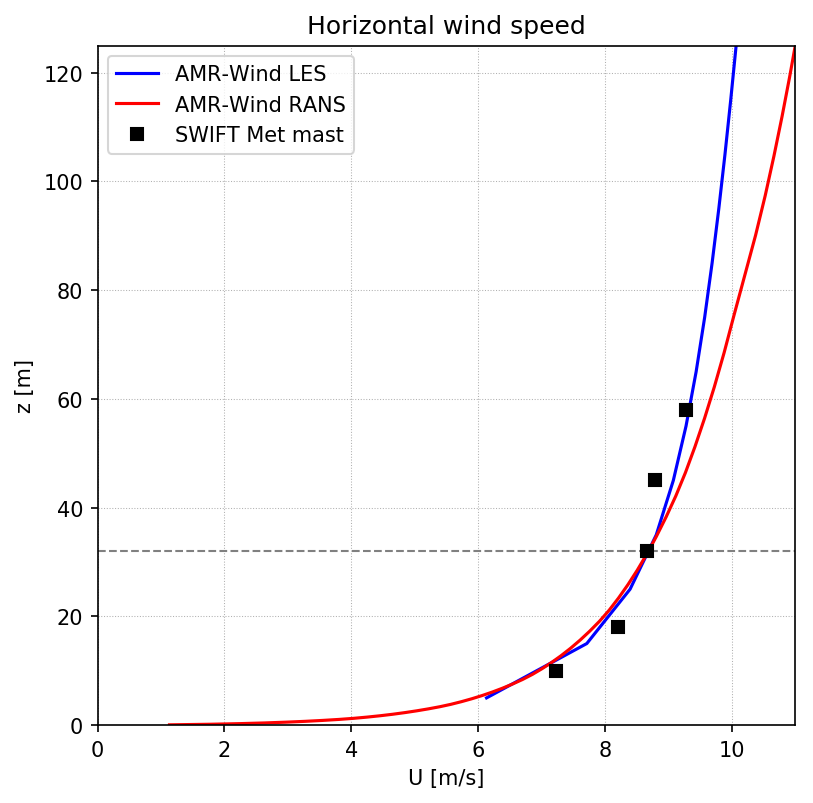

In [5]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command will make the plot directly onto ax
#tutorial2.ABLpostpro_plotprofiles(ax=ax, plotvars=['Uhoriz'], avgt=avgtimes)

# This command returns the data, and then you can plot it individually
#amrdat = LESrun.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)
#plt.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], 'b', label='AMR-Wind LES')
lesdat = np.loadtxt('SWIFT_Neutral_LES_Uhoriz.dat')
plt.plot(lesdat[:,1], lesdat[:,0], 'b', label='AMR-Wind LES')

# Plot RANS profile
amrdat = RANSrun.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=RANSavg)
plt.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], 'r', label='AMR-Wind RANS')

# Plot the met mast
plt.plot(Umetvec, zmetvec, 's', color='k', label='SWIFT Met mast')

# Plot the turbine dimensions
plt.hlines(plotheights[0], 0, 14, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line

#ax.plot(DanAeroWS, DanAeroZ, 's', color='k', label='DanAero')
ax.legend()
ax.set_xlim([0, 11])
ax.set_xlabel('U [m/s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,125])
ax.set_ylabel('z [m]')
ax.set_title('Horizontal wind speed')

## Plot TKE profile

Loading k_rans


Text(0.5,1,'TKE')

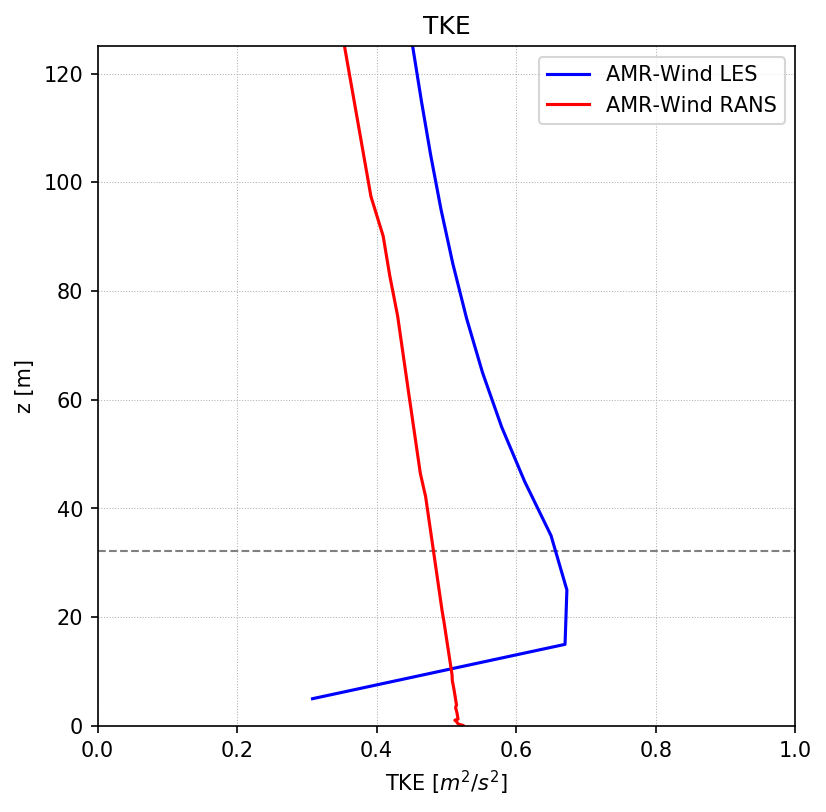

In [6]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
#amrdat = LESrun.ABLpostpro_plotprofiles(plotvars=['TKE'], avgt=avgtimes)
#plt.plot(amrdat['TKE']['data'], amrdat['TKE']['z'],       'b', label='AMR-Wind LES')
lesdat = np.loadtxt('SWIFT_Neutral_LES_TKE.dat')
plt.plot(lesdat[:,1], lesdat[:,0], 'b', label='AMR-Wind LES')


# Plot RANS profile
amrdat = RANSrun.ABLpostpro_plotprofiles(plotvars=['KRANS'], avgt=RANSavg)
plt.plot(amrdat['k_rans']['data'], amrdat['k_rans']['z'], 'r', label='AMR-Wind RANS')

# Plot the met mast
#plt.plot(Umetvec, zmetvec, 's', color='k', label='Met mast')

# Plot the turbine dimensions
plt.hlines(plotheights[0], 0, 14, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line

ax.legend()
ax.set_xlim([0, 1])
ax.set_xlabel('TKE [$m^2/s^2$]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,125])
ax.set_ylabel('z [m]')
ax.set_title('TKE')